Lets import the needed modules for preprocessing.

In [47]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('dark_background')

Now we will load the dataset using pandas.

In [48]:
data=pd.read_csv('./data/housing.csv',sep=',',thousands=',')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


This is a first look on the dataset columns (a view of the first 5 records).
Lets see the names of the features and the shape of the dataset.

In [49]:
data.columns,data.shape

(Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
        'median_house_value', 'ocean_proximity'],
       dtype='object'),
 (20640, 10))

Our dataset is comprised of 20640 records with 10 features per record.
Now lets which features are categorical and see each unique value per feature.

In [50]:
nominal = data.select_dtypes(exclude=["number","bool_"])
print("Unique values per nominal/categorical columns:")
for column in nominal.columns:
    print("------")
    print(column,":",getattr(nominal,column).unique())

Unique values per nominal/categorical columns:
------
ocean_proximity : ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


As we can see , the only categorical feature is ocean_proximity , which has 5 unique values.
Lets get some info about the rest numeric features.

In [51]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Let's check if there are any missing values.

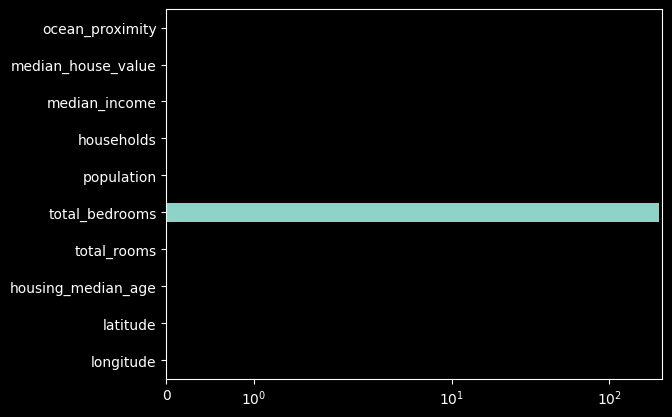

In [52]:
fig, ax = plt.subplots(1, 1)
data.isna().sum().plot.barh(ax=ax)

ax.set_xscale('symlog')

As we can see , the only feature with missing values is total_bedrooms.
We will replace every missing value with the mean of the feature.

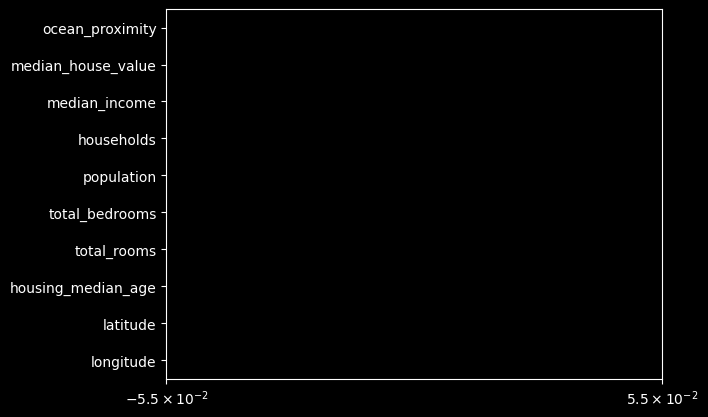

In [53]:
values={"total_bedrooms":data["total_bedrooms"].mean()}
data.fillna(values,inplace=True)
fig, ax = plt.subplots(1, 1)
data.isna().sum().plot.barh(ax=ax)

ax.set_xscale('symlog')

As we can see , we have no missing values now.
Now we want to get a better view of our data through plots.
I will create a density plot and a histogram per feature.

In [55]:
data.select_dtypes(['number']).columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

We have 9 numeric fields

In [62]:
num_feats=data.select_dtypes(['number']).columns 

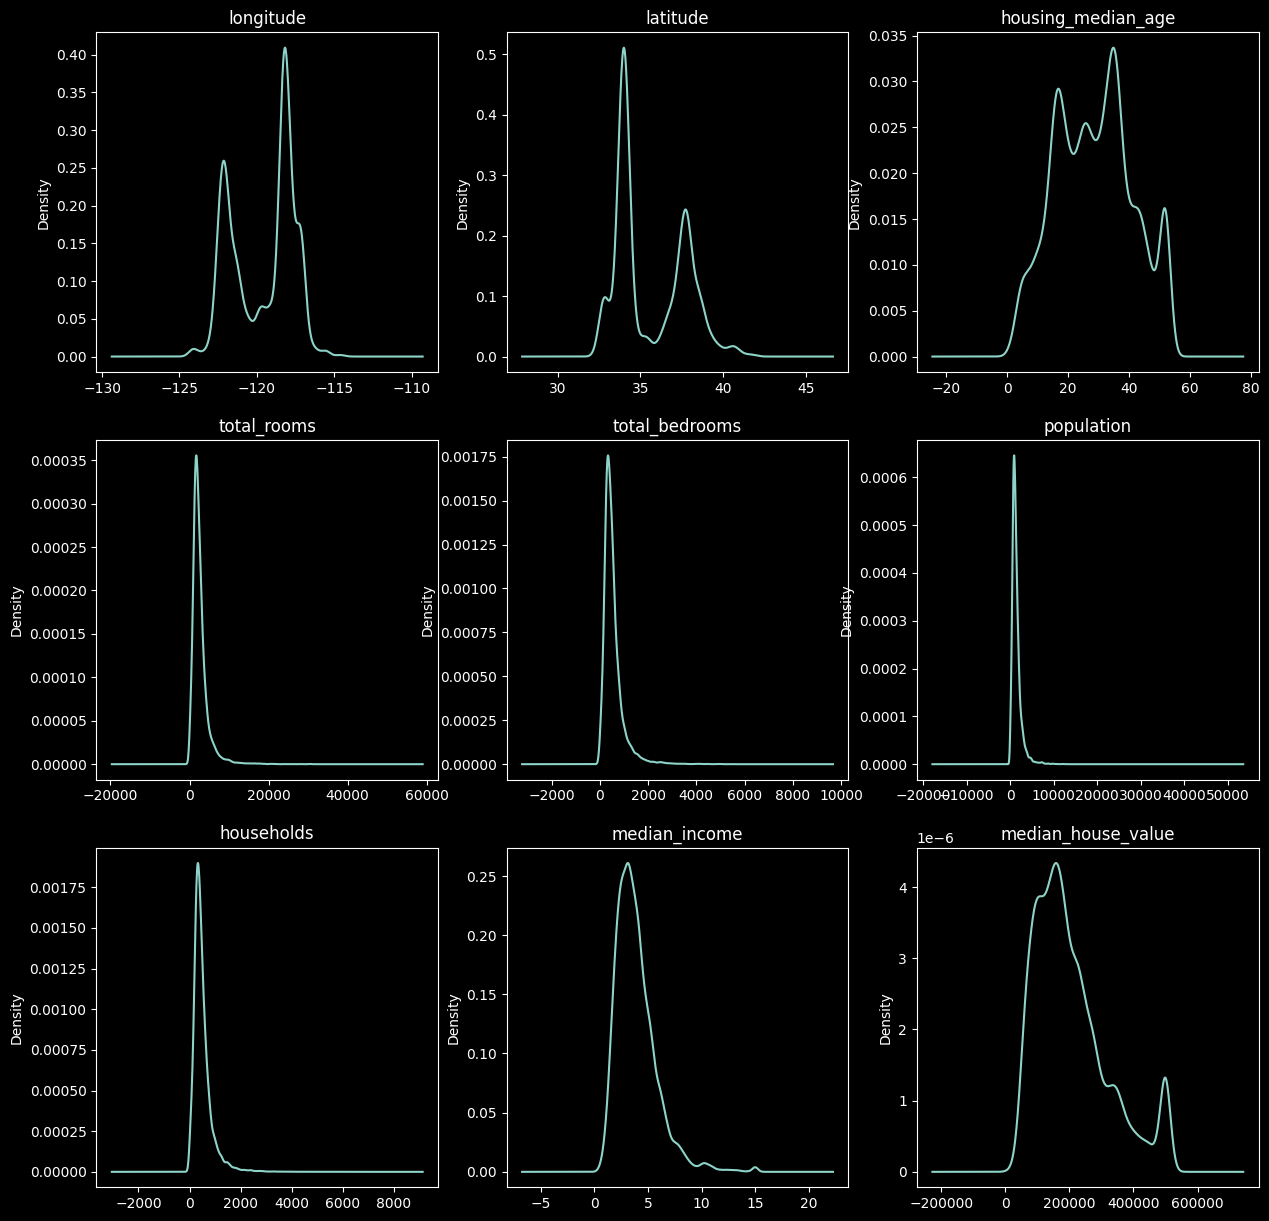

In [63]:
fig,ax=plt.subplots(3,3,figsize=(15,15))

for idx, (ax_i, feat) in enumerate(zip(ax.flatten(), num_feats)):
    data[feat].plot.density(ax=ax_i)
    ax_i.set_title(feat)

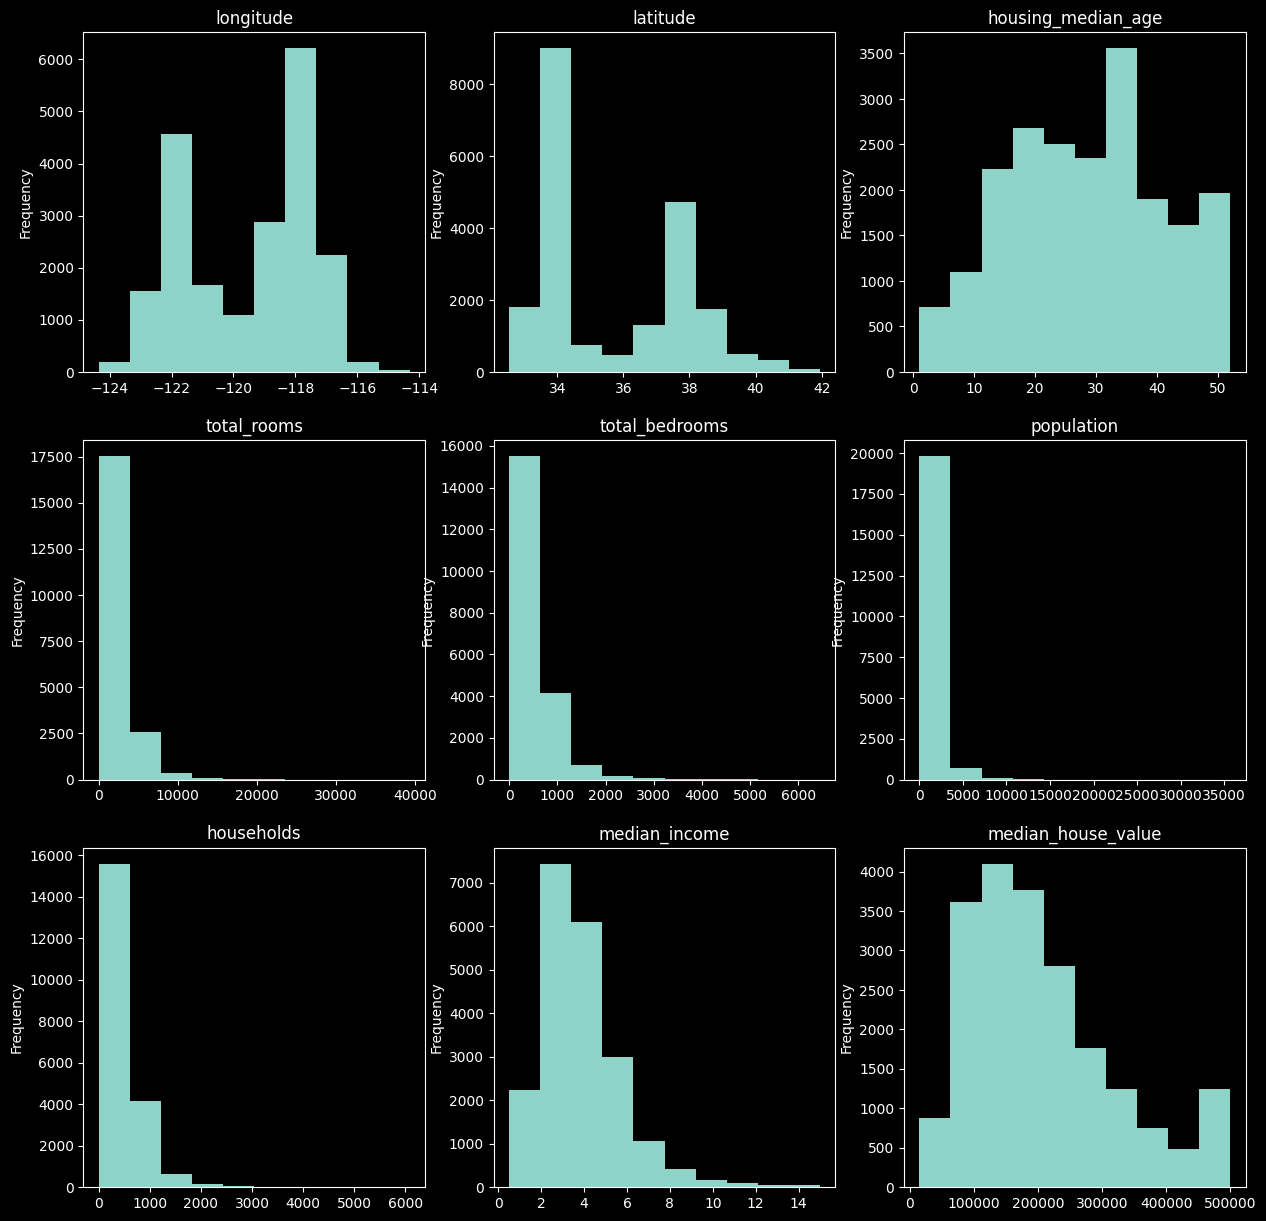

In [64]:
fig,ax=plt.subplots(3,3,figsize=(15,15))

for idx, (ax_i, feat) in enumerate(zip(ax.flatten(), num_feats)):
    data[feat].plot.hist(ax=ax_i)
    ax_i.set_title(feat)